# xAPI-SG Processor

### Processor of traces following the Experience API for Serious Games Profile (xAPI-SG)

**xAPI-SG main reference:**  
*Applying standards to systematize learning analytics in serious games.
Ángel Serrano-Laguna, Iván Martínez-Ortiz, Jason Haag, Damon Regan, Andy Johnson, Baltasar Fernández-Manjón 
Computer Standards & Interfaces 50 (2017) 116–123, http://dx.doi.org/10.1016/j.csi.2016.09.014*

Further info on GitHub wiki page: https://github.com/e-ucm/rage-analytics/wiki/xAPI-SG-Profile 

The following code:
- expects as input a JSON file with a list of xAPI-SG statements
- analyzes the xAPI-SG statements and fills an adaptation of the default ser of visualizations
https://github.com/e-ucm/rage-analytics/wiki/Default-visualizations-teacher 

In [5]:
import json
from typing import Dict, Any
import numpy as np
from datetime import datetime
import copy
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
%run ProcessxAPISGStatement.ipynb # notebook to process an xAPI-SG statement

In [28]:
# file with xAPI-SG statements      
location="./" # file location
file_name="xapi-sg-sample-data.json" # file name
file_name="conectado_xapi-statement.json"

players_info: Dict[Any, Any] = {} # dict with players info
start_time = datetime.now() 

## FILE MUST CONTAIN LIST OF XAPI-SG PROFILE TRACES
## (traces separated by commas and enclosed by []) 
with open(location+file_name, 'r') as f:
    statements_dict = json.load(f)
    for s in statements_dict:
        process_xapisg_statement(s, players_info)
    
end_time = datetime.now()

import pprint
pprint.pprint(players_info)

{'bkny': {'alternatives': {},
          'completables_progress': {'AlejandroFS': -20.0,
                                    'AlisonFS': 20.0,
                                    'AnaFS': -20.0,
                                    'ParentsFS': 10.0},
          'completables_scores': {'Day1AfternoonHome': 1.0,
                                  'Day1MorningSchool': 1.0,
                                  'Day3MorningHome': 1.0,
                                  'Day4AfternoonHome': 1.0,
                                  'Nightmare1': 1.0,
                                  'Nightmare4': 1.0},
          'completables_times': {},
          'game_completed': False,
          'game_progress_per_time': [],
          'game_started': False,
          'interactions': {'game-object': {'Alejandro': [{'GameDay': 0.0,
                                                          'GameHour': '11:5',
                                                          'IsRepeatedDay': 'False',
                         

**Pie chart with number of games started and completed**

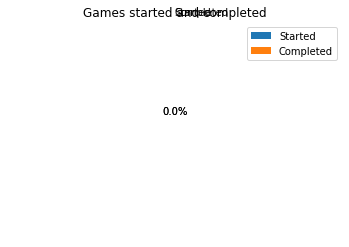

In [8]:
%run vis/xAPISG-GamesStartedCompleted.ipynb
vis_games_started_completed(players_info)

**Bar chart with number of times each video was seen and skipped**

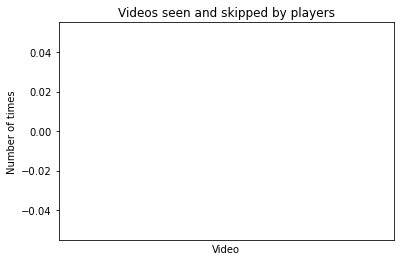

In [9]:
%run vis/xAPISG-VideosSeenSkipped.ipynb
vis_videos_seen_skipped(players_info)

**Line chart with progress of players per time**

No handles with labels found to put in legend.


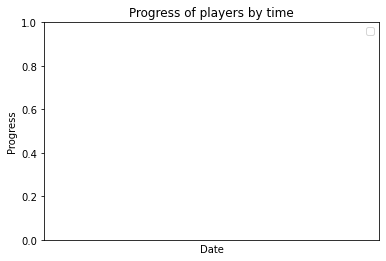

In [10]:
%run vis/xAPISG-PlayersProgress.ipynb
vis_players_progress(players_info)

**Bar chart with scores of players in each completable**

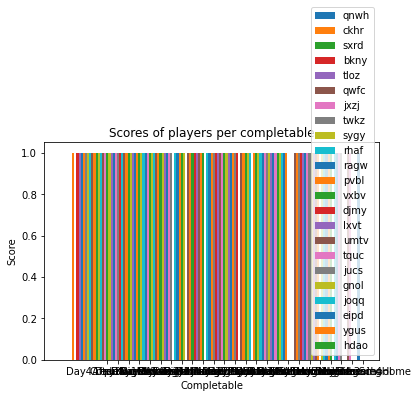

In [11]:
%run vis/xAPISG-CompletablesScores.ipynb
vis_completables_scores(players_info)

**Bar chart with progress of players in each completable**

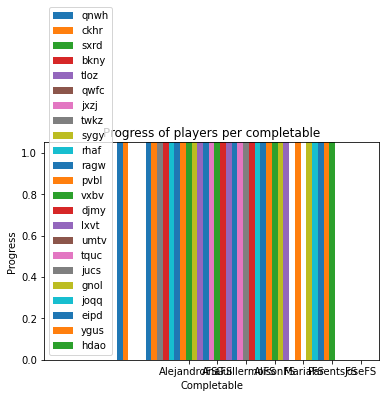

In [12]:
%run vis/xAPISG-CompletablesProgress.ipynb
vis_completables_progress(players_info)

**Bar chart with max and min completion time in each completable**

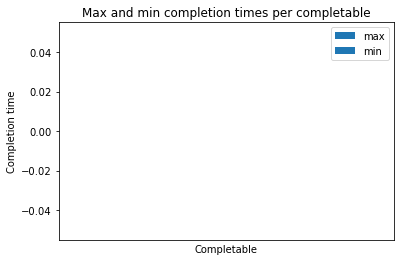

In [13]:
%run vis/xAPISG-CompletablesTimes.ipynb
vis_completables_times(players_info)

**Bar chart with number of correct and incorrect answers per player**

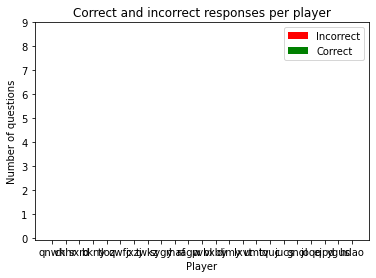

In [14]:
%run vis/xAPISG-CorrectIncorrectPlayer.ipynb
vis_correct_incorrect_player(players_info)

**Bar chart with number of correct and incorrect answers per question (alternative)**

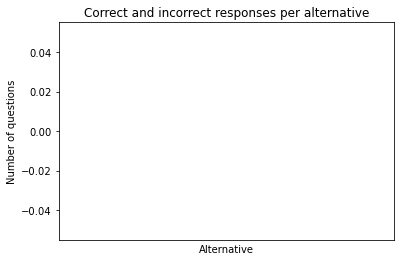

In [15]:
%run vis/xAPISG-CorrectIncorrectQuestion.ipynb
vis_correct_incorrect_question(players_info)

**Bar chart per question, with number of times each alternative has been selected**

In [16]:
%run vis/xAPISG-AlternativesSelectedQuestion.ipynb
vis_alternatives_selected_question(players_info)

<Figure size 432x288 with 0 Axes>

{'qnwh': {'offComputer': 0, 'sinks': 1, 'StairsToCorridor': 3, 'takeMobile': 0, 'openMobileChat': 0, 'WardrobeInside2': 3, 'Maria': 3, 'board': 0, 'Teacher': 0, 'Bed': 1, 'Accepted_Jose_request': 0, 'open_Clase': 0, 'Ana': 5, 'AlexAndAna': 1, 'hideMobile': 0, 'PrincipalNote': 0, 'Door': 2, 'GuilleGroup': 0, 'Mother': 4, 'LivingroomDoor': 6, 'FemaleBathroom': 2, 'ana': 0, 'maleBathroom': 1, 'ShowComputerFriends': 0, 'mobile': 0, 'bathroomExit': 6, 'MaleBathroom': 1, 'Guille': 3, 'ShowComputerLogin': 0, 'shine': 1, 'GuilleAndAlison': 0, 'alison': 0, 'open_Maria': 0, 'StairsToPlayground': 5, 'Board': 0, 'anaGroup': 0, 'Alex': 0, 'Deny_Guillermo_request': 0, 'Group': 1, 'Jose': 3, 'Father': 2, 'open_Alison Clase': 0, 'SchoolEnter': 4, 'door': 0, 'parents': 0, 'mirror': 0, 'femaleBathroom': 1, 'Computer': 4, 'onComputer': 0, 'ShowComputerPublications': 0, 'openFriendsApp': 0, 'Bag': 1, 'Parents': 0, 'DoorToStairs': 5, 'jose': 0, 'guille': 0, 'BedroomDoor': 2, 'WardrobeInside1': 4, 'Guillerm

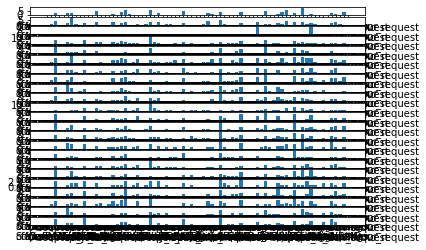

In [34]:
%run vis/xAPISG-ItemAcceded.ipynb
vis_items_times(players_info)